(i) Problem Definition

My aim to **predict the delivery duration** (in minutes) of food orders based on features like order size, item prices, store type, and delivery partner availability.

This is a classic **regression problem** (estimation) where the target variable is:
`delivery_duration = actual_delivery_time - created_at`

By predicting delivery time, we help optimize delivery logistics and improve customer satisfaction.


 Step (ii): Load & Explore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/dataset.csv')


In [62]:
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
display(df.describe())

Columns: ['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 'delivery_duration']
Shape: (17447, 12)


,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_duration
count,17361.000000,17447.000000,17361.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,16072.000000,16072.000000,16072.000000,17447.000000
mean,2.958067,26.858486,2.772133,3.339600,2709.822548,2.755030,666.904683,1165.946294,43.046727,40.244774,55.872325,56.687321
std,1.499798,17.304188,1.464137,2.748368,1843.596457,1.665805,533.806169,585.933793,34.232853,32.086771,52.159309,1074.454774
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,85.000000,-2.000000,-1.000000,-2.000000,3.716667
25%,2.000000,13.000000,1.000000,2.000000,1420.000000,2.000000,285.000000,799.000000,15.000000,13.000000,15.000000,35.583333
50%,3.000000,29.000000,3.000000,3.000000,2244.000000,2.000000,550.000000,1095.000000,34.000000,33.000000,38.000000,45.266667
75%,4.000000,43.000000,4.000000,4.000000,3436.000000,4.000000,900.000000,1400.000000,63.000000,61.000000,82.250000,57.766667
max,6.000000,59.000000,6.000000,57.000000,18370.000000,20.000000,7475.000000,8500.000000,160.000000,153.000000,276.000000,141947.650000


(ii): Exploratory Data Analysis

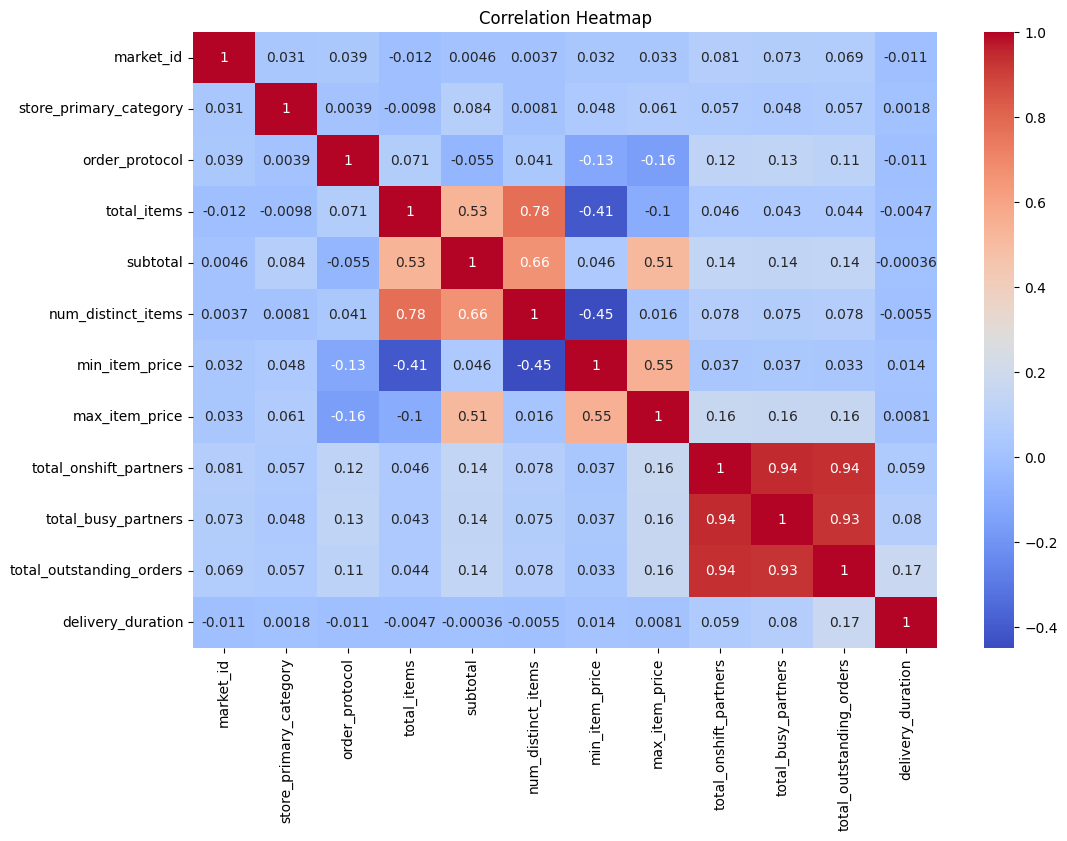

In [63]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

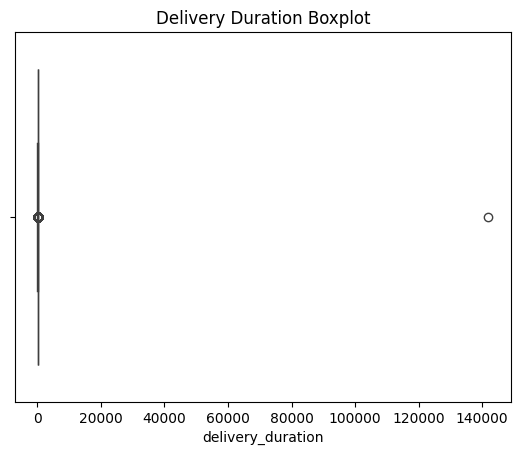

In [64]:
# Boxplot to visualize target variable (delivery_duration)
sns.boxplot(x=df['delivery_duration'])
plt.title("Delivery Duration Boxplot")
plt.show()


In [65]:
# Pearson correlations and p-values
features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']
for feature in features:
    corr, p_val = pearsonr(df[feature], df['delivery_duration'])
    print(f"{feature}: Pearson r = {corr:.3f}, p-value = {p_val:.3e}")

total_items: Pearson r = -0.005, p-value = 5.318e-01
subtotal: Pearson r = -0.000, p-value = 9.624e-01
num_distinct_items: Pearson r = -0.005, p-value = 4.704e-01
min_item_price: Pearson r = 0.014, p-value = 7.318e-02
max_item_price: Pearson r = 0.008, p-value = 2.824e-01


(iii): Data Cleaning & Transformation

In [66]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Drop rows with missing values in relevant columns
df = df.dropna(subset=features + ['delivery_duration'])

In [67]:
# Handle categorical feature
df['store_primary_category'] = df['store_primary_category'].fillna("unknown")
le = LabelEncoder()
df['store_primary_category'] = le.fit_transform(df['store_primary_category'])


In [68]:
# Split data into features and target
X = df.drop('delivery_duration', axis=1)
y = df['delivery_duration']

In [69]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [72]:
# Combine X and y, drop rows with any remaining NaNs
df_final = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
df_final = df_final.dropna().reset_index(drop=True)

# Separate cleaned data
X_clean = df_final.drop('delivery_duration', axis=1)
y_clean = df_final['delivery_duration']


(iv): Apply Regression Models

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [74]:
# Train-test split (after fixing NaNs)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [75]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [76]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [77]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

(v): Evaluate the Models

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Evaluation:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.3f}")
    print("-" * 40)

# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)


Linear Regression Evaluation:
  RMSE: 19.39
  R² Score: 0.133
----------------------------------------
Random Forest Regressor Evaluation:
  RMSE: 18.78
  R² Score: 0.187
----------------------------------------


In [80]:
import joblib

# Save model and preprocessors
joblib.dump(rf_model, '/content/rf_model.joblib')
joblib.dump(scaler, '/content/scaler.pkl')
joblib.dump(le, '/content/label_encoders.pkl')



['/content/label_encoders.pkl']

In [82]:
from google.colab import files
files.download('/content/scaler.pkl')
files.download('/content/label_encoders.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
files.download('/content/rf_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>